# Datapoint check
---
1. sample audio 파형 시각화

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [35]:
# import
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio
import numpy as np

In [80]:
database_dir = '/content/drive/MyDrive/data/ICBHI_final_database'
sample_filename = '158_2p3_Tc_mc_AKGC417L'

In [19]:
y, sr = librosa.load(os.path.join(database_dir, sample_filename+'.wav'), sr=8000)

## 1. sample audio 파형 시각화

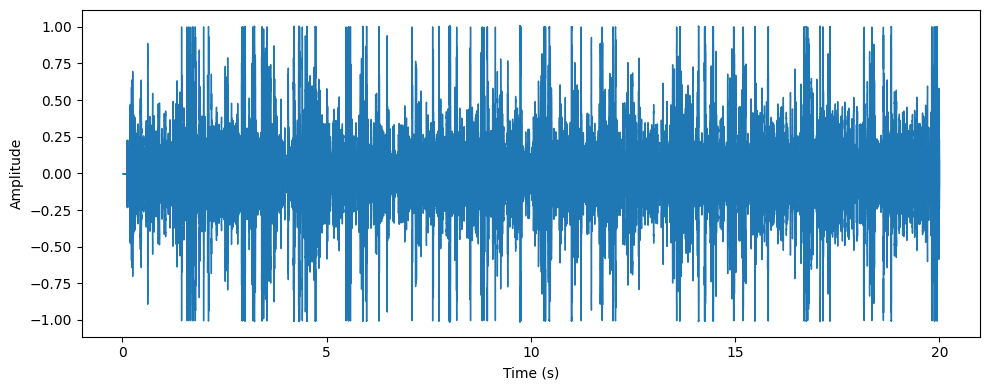

In [33]:
# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

## 2. 들어보기

In [20]:
Audio(data=y, rate=sr)

## 3. 해당 audio sample 어노테이션 정보 확인

In [43]:
sample_annot = pd.read_csv(os.path.join(database_dir, sample_filename+'.txt'), sep='\t', header=None, names=['start', 'end', 'crackles', 'wheezes'])
sample_annot

,start,end,crackles,wheezes
0,0.075,1.194,0,1
1,1.194,3.281,1,1
2,3.281,5.117,0,1
3,5.117,6.753,0,1
4,6.753,8.339,0,1
5,8.339,9.975,1,1
6,9.975,11.544,0,1
7,11.544,13.264,0,1
8,13.264,14.766,0,1
9,14.766,16.386,0,1


## 4. mel spectrogram + annotation 영역 표시

In [50]:
data_list = sample_annot.to_dict('records')
data_list

[{'start': 0.075, 'end': 1.194, 'crackles': 0, 'wheezes': 1},
 {'start': 1.194, 'end': 3.281, 'crackles': 1, 'wheezes': 1},
 {'start': 3.281, 'end': 5.117, 'crackles': 0, 'wheezes': 1},
 {'start': 5.117, 'end': 6.753, 'crackles': 0, 'wheezes': 1},
 {'start': 6.753, 'end': 8.339, 'crackles': 0, 'wheezes': 1},
 {'start': 8.339, 'end': 9.975, 'crackles': 1, 'wheezes': 1},
 {'start': 9.975, 'end': 11.544, 'crackles': 0, 'wheezes': 1},
 {'start': 11.544, 'end': 13.264, 'crackles': 0, 'wheezes': 1},
 {'start': 13.264, 'end': 14.766, 'crackles': 0, 'wheezes': 1},
 {'start': 14.766, 'end': 16.386, 'crackles': 0, 'wheezes': 1},
 {'start': 16.386, 'end': 17.955, 'crackles': 0, 'wheezes': 1},
 {'start': 17.955, 'end': 19.524, 'crackles': 0, 'wheezes': 1}]

In [81]:
# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
n_mels = 128  # 멜 필터뱅크의 수
nfft = 512  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

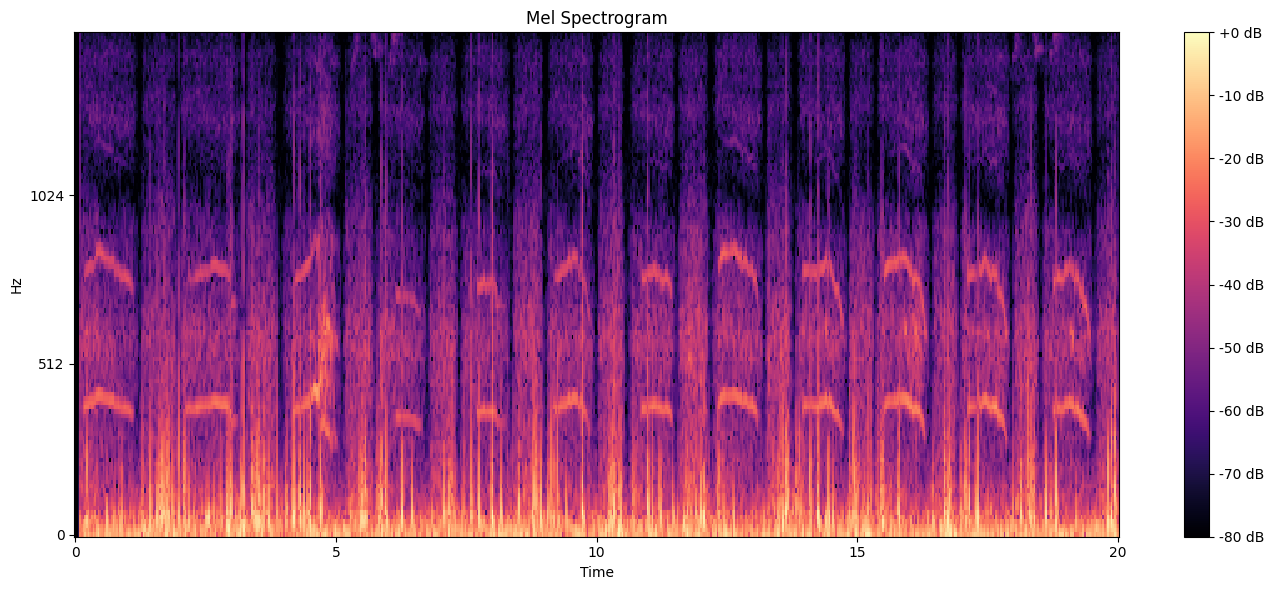

In [56]:
# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

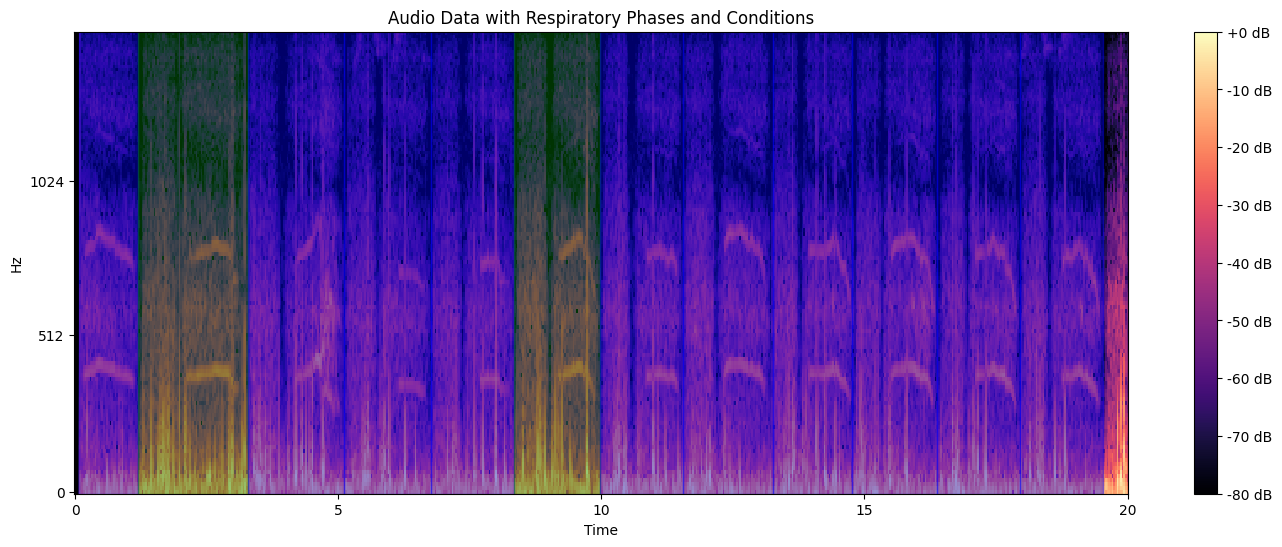

,start,end,crackles,wheezes
0,0.075,1.194,0,1
1,1.194,3.281,1,1
2,3.281,5.117,0,1
3,5.117,6.753,0,1
4,6.753,8.339,0,1
5,8.339,9.975,1,1
6,9.975,11.544,0,1
7,11.544,13.264,0,1
8,13.264,14.766,0,1
9,14.766,16.386,0,1


In [63]:
# annotation 영역 표시
plt.figure(figsize=(17, 6))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Audio Data with Respiratory Phases and Conditions')

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["start"]
    end = entry["end"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    plt.axvspan(start, end, color=color, alpha=0.4)
plt.show()
sample_annot

# 표현 좋은 sample audio (wikipedia)

crackle sample: https://en.m.wikipedia.org/wiki/File:Crackles_pneumoniaO.ogg<br>
wheeze sample: https://en.m.wikipedia.org/wiki/File:Wheeze2O.ogg


In [82]:
crackle_sample = '/content/drive/MyDrive/for_update/data/eda/Crackles_pneumoniaO.ogg'
wheeze_sample = '/content/drive/MyDrive/for_update/data/eda/Wheeze2O.ogg'

In [71]:
y_c, sr = librosa.load(crackle_sample)
y_w, sr = librosa.load(wheeze_sample)

## Crackle

In [69]:
print('crackle sound\n')
Audio(data=y_c, rate=sr)

crackle sound



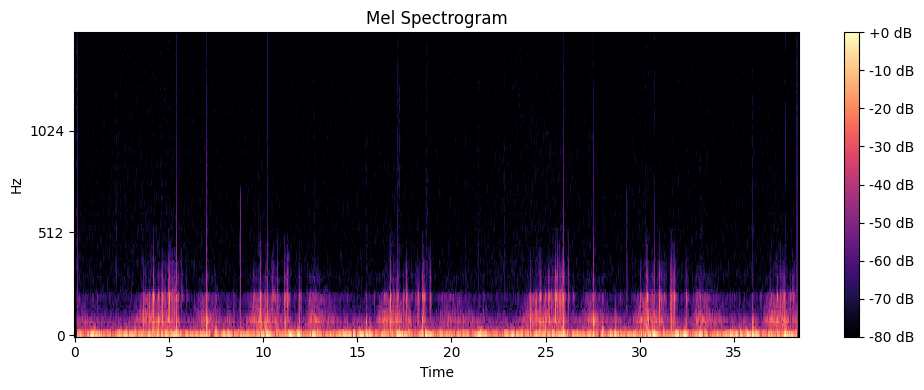

In [88]:
# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S_c = librosa.feature.melspectrogram(y=y_c, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S_c, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

## Wheeze

In [72]:
print('wheeze sound\n')
Audio(data=y_w, rate=sr)

wheeze sound



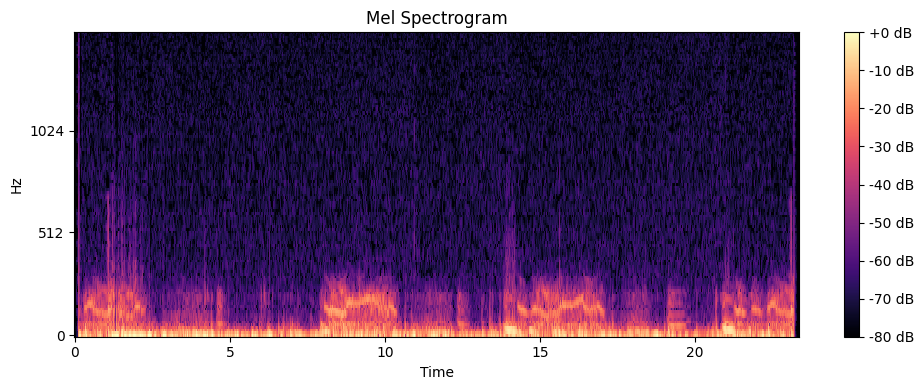

In [87]:
# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S_w = librosa.feature.melspectrogram(y=y_w, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S_w, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()